In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
#make_regression?
bias = 200
X, y, coef = make_regression(n_features=1, noise=10, bias=bias, random_state=42, coef=True)

In [4]:
X.shape, y.shape

((100, 1), (100,))

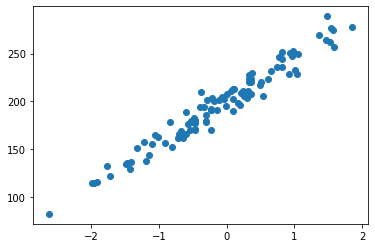

In [5]:
plt.scatter(X, y)

In [7]:
coef,bias # m c from sklearn

(array(41.74110031), 200)

In [8]:
y_gen = X * coef + bias # equation of line

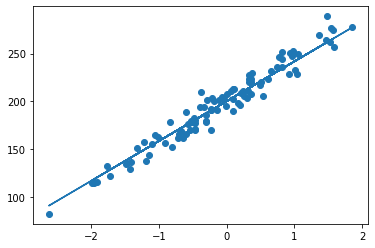

In [9]:
plt.scatter(X, y)
plt.plot(X, y_gen) #perfect line

### Lets plot a line using Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(X, y)
# work during training ==> figuring out coef & intercept

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
model.coef_, model.intercept_  #underscore means that it was generated after fit was called

(array([44.43716999]), 201.16511532052695)

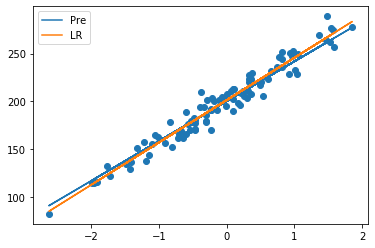

In [14]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="LR")
plt.legend()

In [16]:
class LinearRegCustom:
    # constructor
    def __init__(self, lr=0.1):
        self.lr = lr
    
    # training function i.e. fit
    def fit(self, X, y):
        self._X = X # _X mock behavior like private
        self._y = y.reshape(-1, 1) # do calculations, else it will give error due to some numpy shape
        
        # need to figure out value of coef & intercept
        # step 1: pick these values at random 
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        # gradient descent
        errors = []
        
        # lets say we do this 50 times
        for i in range(50):
            self.gradient_decend()
            errors.append(self.error())
        return errors
    
    def gradient_decend(self):
        # change in coef and intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yh = self.predict(self._X) # from predict funtion
        
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()

In [17]:
model = LinearRegCustom(lr=.1)

In [18]:
errors = model.fit(X, y)

In [19]:
model.coef_, model.intercept_

(42.74282089502123, 199.66201153818832)

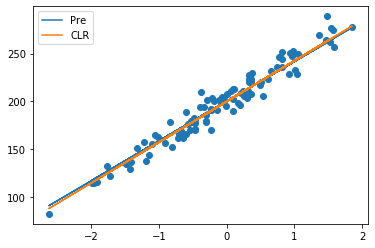

In [20]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()

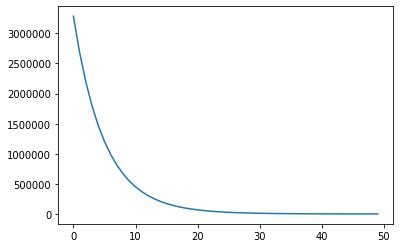

In [21]:
plt.plot(errors)

In [22]:
model.error()

8215.966892189903

In [23]:
# show change with learning rate
# for i in range(1, 10):
#     model = LinearRegCustom(lr=.5 * i)
#     errors = model.fit(X, y)
    
#     plt.figure()
    
#     plt.title(str(.5 * i))
#     plt.plot(errors)

# Housing problem

In [24]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split

In [25]:
X, y = load_boston(return_X_y=True)

In [29]:
boston = load_boston()
#print(boston.DESCR)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
model.predict(X_test[:5]) #prices of first 5 houses

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ])

In [37]:
y_test[:5] #actual

array([23.6, 32.4, 13.6, 22.8, 16.1])

In [38]:
X_test[:5]#features

array([[9.17800e-02, 0.00000e+00, 4.05000e+00, 0.00000e+00, 5.10000e-01,
        6.41600e+00, 8.41000e+01, 2.64630e+00, 5.00000e+00, 2.96000e+02,
        1.66000e+01, 3.95500e+02, 9.04000e+00],
       [5.64400e-02, 4.00000e+01, 6.41000e+00, 1.00000e+00, 4.47000e-01,
        6.75800e+00, 3.29000e+01, 4.07760e+00, 4.00000e+00, 2.54000e+02,
        1.76000e+01, 3.96900e+02, 3.53000e+00],
       [1.05740e-01, 0.00000e+00, 2.77400e+01, 0.00000e+00, 6.09000e-01,
        5.98300e+00, 9.88000e+01, 1.86810e+00, 4.00000e+00, 7.11000e+02,
        2.01000e+01, 3.90110e+02, 1.80700e+01],
       [9.16400e-02, 0.00000e+00, 1.08100e+01, 0.00000e+00, 4.13000e-01,
        6.06500e+00, 7.80000e+00, 5.28730e+00, 4.00000e+00, 3.05000e+02,
        1.92000e+01, 3.90910e+02, 5.52000e+00],
       [5.09017e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.29700e+00, 9.18000e+01, 2.36820e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.85090e+02, 1.72700e+01]])

# Salary Dataset

In [41]:
dataset = pd.read_csv("C:\\Users\\91865\\Desktop\\Streamlit Demo\\Salary Project\\Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [42]:
X = dataset.iloc[:, :-1].values #all rows,last column VALUES
y = dataset.iloc[:, 1].values #all rows,first col

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [44]:
model = LinearRegression()

In [45]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
model.predict(X_test[:5])

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028])

In [47]:
y_test[:5] #actual ans

array([112635.,  67938., 113812.,  83088.,  64445.])

In [48]:
X_test[:5] #enetered input

array([[9.6],
       [4.9],
       [8.2],
       [5.3],
       [3.2]])

In [49]:
model.score(X_test, y_test)

0.9553063138044949

In [50]:
yrs = int(input("How many yrs of experience do you have: "))

sal = model.predict(np.array([yrs]).reshape(-1, 1))

print("\nYour estimated salary is $", round(sal[0], 3))

How many yrs of experience do you have:  3



Your estimated salary is $ 53602.452
